In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

data = [
("I love this movie, it's fantastic!", 1),
("Horrible experience, it was terrible.", 0),
("Absolutely wonderful acting!", 1),
("Worst movie ever", 0),
("An amazing film. Would definitely watch again.", 1),
("Worst movie ever made.", 0),
("I thoroughly enjoyed it from start to finish.", 1),
("The acting was bad and the story made no sense.", 0),
("This is one of my favorite movies!", 1),
("I regret watching this movie. Waste of time.", 0),
("Excellent performances and a gripping plot!", 1),
("Completely dull. I almost fell asleep.", 0),
("Fantastic visuals and storytelling.", 1),
("The script was awful and full of clichés.", 0),
("What an inspiring and emotional film.", 1),
("Nothing good about it. Avoid at all costs.", 0),
("A brilliant masterpiece.", 1),
("Not worth the hype.", 0),
("Pure cinematic joy!", 1),
("Horribly directed and badly acted.", 0),
("Loved every moment!", 1),
("Disappointing sequel to a great first film.", 0),
("Truly a wonderful experience.", 1),
("The jokes fell flat and the pacing was off.", 0),]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Preprocessing
ps = PorterStemmer ()
stop_words = set (stopwords.words('english' ))

def preprocess(text):
    tokens = word_tokenize(text. lower())
    tokens = [ps.stem(word) for word in tokens if word. isalnum() and word not in stop_words]
    return tokens
# Tokenize all texts
tokenized_data = [(preprocess(text), label) for text, label in data]
vocab = sorted(set(word for sentence,_ in tokenized_data for word in sentence))
word2idx = {word: i+1 for i, word in enumerate(vocab)} # Reserve 0 for padding
idx2word = {i: word for word, i in word2idx.items()}
vocab_size = len(word2idx) + 1
print ("Sample vocabulary:", word2idx)

Sample vocabulary: {'absolut': 1, 'act': 2, 'almost': 3, 'amaz': 4, 'asleep': 5, 'avoid': 6, 'aw': 7, 'bad': 8, 'badli': 9, 'brilliant': 10, 'cinemat': 11, 'cliché': 12, 'complet': 13, 'cost': 14, 'definit': 15, 'direct': 16, 'disappoint': 17, 'dull': 18, 'emot': 19, 'enjoy': 20, 'ever': 21, 'everi': 22, 'excel': 23, 'experi': 24, 'fantast': 25, 'favorit': 26, 'fell': 27, 'film': 28, 'finish': 29, 'first': 30, 'flat': 31, 'full': 32, 'good': 33, 'great': 34, 'grip': 35, 'horribl': 36, 'hype': 37, 'inspir': 38, 'joke': 39, 'joy': 40, 'love': 41, 'made': 42, 'masterpiec': 43, 'moment': 44, 'movi': 45, 'noth': 46, 'one': 47, 'pace': 48, 'perform': 49, 'plot': 50, 'pure': 51, 'regret': 52, 'script': 53, 'sens': 54, 'sequel': 55, 'start': 56, 'stori': 57, 'storytel': 58, 'terribl': 59, 'thoroughli': 60, 'time': 61, 'truli': 62, 'visual': 63, 'wast': 64, 'watch': 65, 'wonder': 66, 'worst': 67, 'worth': 68, 'would': 69}


In [52]:
from torch.nn.utils.rnn import pad_sequence

def encode_sentence(sentence):
  return torch.tensor([word2idx[word] for word in sentence], dtype=torch.long)

# Encode and pad
encoded_sentences = [encode_sentence(s) for s, _ in tokenized_data]
labels = torch.tensor([label for _, label in tokenized_data])

padded_sentences = pad_sequence(encoded_sentences, batch_first=True)
print("Padded input shape:", padded_sentences.shape)

Padded input shape: torch.Size([24, 5])


In [53]:
class RNNClassifier(nn.Module):
  def __init__(self, vocab_size, embed_dim, hidden_dim):
    super().__init__()
    self.embed = nn.Embedding(vocab_size, embed_dim)
    self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
    self.fc = nn.Linear(hidden_dim, 2)

  def forward(self,x):
    embedded = self.embed(x)
    output, hidden = self.rnn(embedded)
    return self.fc(hidden.squeeze(0))

Epoch 1: Loss = 0.6845
Epoch 2: Loss = 0.5838
Epoch 3: Loss = 0.4986
Epoch 4: Loss = 0.4166
Epoch 5: Loss = 0.3381
Epoch 6: Loss = 0.2673
Epoch 7: Loss = 0.1988
Epoch 8: Loss = 0.1278
Epoch 9: Loss = 0.0662
Epoch 10: Loss = 0.0320
Epoch 11: Loss = 0.0174
Epoch 12: Loss = 0.0097
Epoch 13: Loss = 0.0055
Epoch 14: Loss = 0.0032
Epoch 15: Loss = 0.0019
Epoch 16: Loss = 0.0012
Epoch 17: Loss = 0.0008
Epoch 18: Loss = 0.0006
Epoch 19: Loss = 0.0004
Epoch 20: Loss = 0.0004


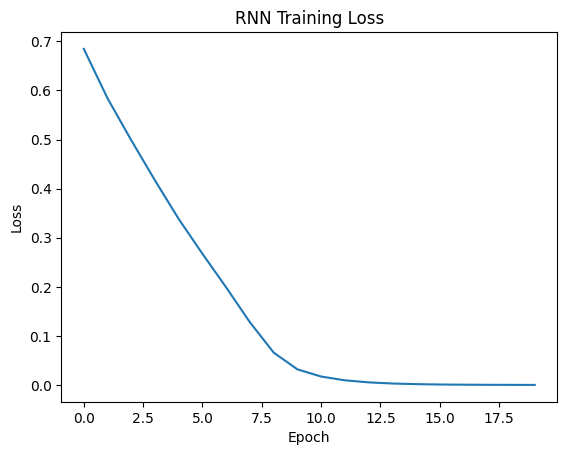

In [54]:
def train_model (model, X, y, epochs=20):
  optimizer = optim. Adam(model.parameters(), lr=0.01)
  loss_fn = nn.CrossEntropyLoss()
  losses = []

  for epoch in range(epochs) :
    model. train()
    optimizer.zero_grad()
    output = model (X)
    loss = loss_fn(output, y)
    loss.backward()
    optimizer. step()
    losses.append(loss. item ( ))
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")
  
  # Plot loss
  plt.plot(losses)
  plt.title("RNN Training Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()
  return model

rnn_model = RNNClassifier(vocab_size, embed_dim=16, hidden_dim=32)
trained_rnn = train_model(rnn_model, padded_sentences, labels)

In [55]:
def predict(model, sentence):
  model.eval()
  tokens = preprocess(sentence)
  input_tensor = encode_sentence(tokens).unsqueeze(0)
  with torch.no_grad():
    output = model(input_tensor)
    pred = torch.argmax(output, dim=1).item()
  return "Positive" if pred == 1 else "Negative"

print(predict(trained_rnn, "What a wonderful movie"))
print(predict(trained_rnn, "This was terrible"))

Positive
Negative


In [56]:
class LSTMClassifier(nn.Module):
  def __init__(self, vocab_size, embed_dim, hidden_dim):
    super().__init__()
    self.embed = nn.Embedding(vocab_size, embed_dim)
    self.lstm = nn. LSTM(embed_dim, hidden_dim, batch_first=True)
    self.fc = nn. Linear (hidden_dim, 2)
  def forward (self, x):
    embedded = self. embed(x)
    output, (hidden, _) = self. lstm(embedded)
    return self.fc(hidden[-1]) # last hidden state

Epoch 1: Loss = 0.7057
Epoch 2: Loss = 0.6729
Epoch 3: Loss = 0.6486
Epoch 4: Loss = 0.6230
Epoch 5: Loss = 0.5911
Epoch 6: Loss = 0.5495
Epoch 7: Loss = 0.4959
Epoch 8: Loss = 0.4307
Epoch 9: Loss = 0.3574
Epoch 10: Loss = 0.2772
Epoch 11: Loss = 0.1942
Epoch 12: Loss = 0.1184
Epoch 13: Loss = 0.0601
Epoch 14: Loss = 0.0278
Epoch 15: Loss = 0.0156
Epoch 16: Loss = 0.0104
Epoch 17: Loss = 0.0070
Epoch 18: Loss = 0.0043
Epoch 19: Loss = 0.0024
Epoch 20: Loss = 0.0013


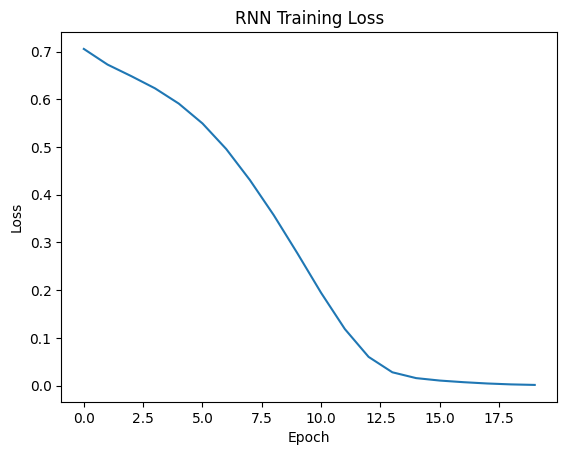

Positive
Negative


In [57]:
lstm_model = LSTMClassifier(vocab_size, embed_dim=16, hidden_dim=32)
trained_lstm = train_model(lstm_model, padded_sentences, labels)
print(predict(trained_lstm, "I love this movie"))
print(predict(trained_lstm, "This was the worst movie"))